### This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. Building a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

### IMPORTING NECESSARY LIBRARIES. 

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,auc,plot_roc_curve
plt.style.use('ggplot')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

### LOADING THE DATASET

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The dataset is divided into three formats i.e, object, int64 and float64

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.isin(['NAN','NA','N/A','-',' ',np.nan]).sum().any()

True

The dataset has many missing values. Columns of missing values are-

1.Gender               

2.Married               

3.Dependents           

4.Self_Employed        

5.LoanAmount           

6.Loan_Amount_Term     

7.Credit_History       

In [8]:
# Value counts for every feature to check the missing again or unique values
for i in df.columns:
    print(df[i].value_counts())
    print('**********************************')


LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
**********************************
Male      489
Female    112
Name: Gender, dtype: int64
**********************************
Yes    398
No     213
Name: Married, dtype: int64
**********************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
**********************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
**********************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
**********************************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
**********************************
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
#filling missing values with mode.

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No missing values are present.

In [12]:
# encode categorical variables

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})


In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,Y


### CONVERTING CATEGORICAL DATA TO NUMERICAL

In [14]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['Dependents']=le.fit_transform(df['Dependents'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])


In [15]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int32
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int32
dtype: object

In [16]:
df.shape

(614, 13)

### UNIVARIATE ANALYSIS

In [17]:
df.drop('Loan_ID', axis=1, inplace=True)

column is dropped as part of the data preprocessing step before model building.

1.Loan_ID column was dropped as it is just an identifier and does not contribute to the prediction.

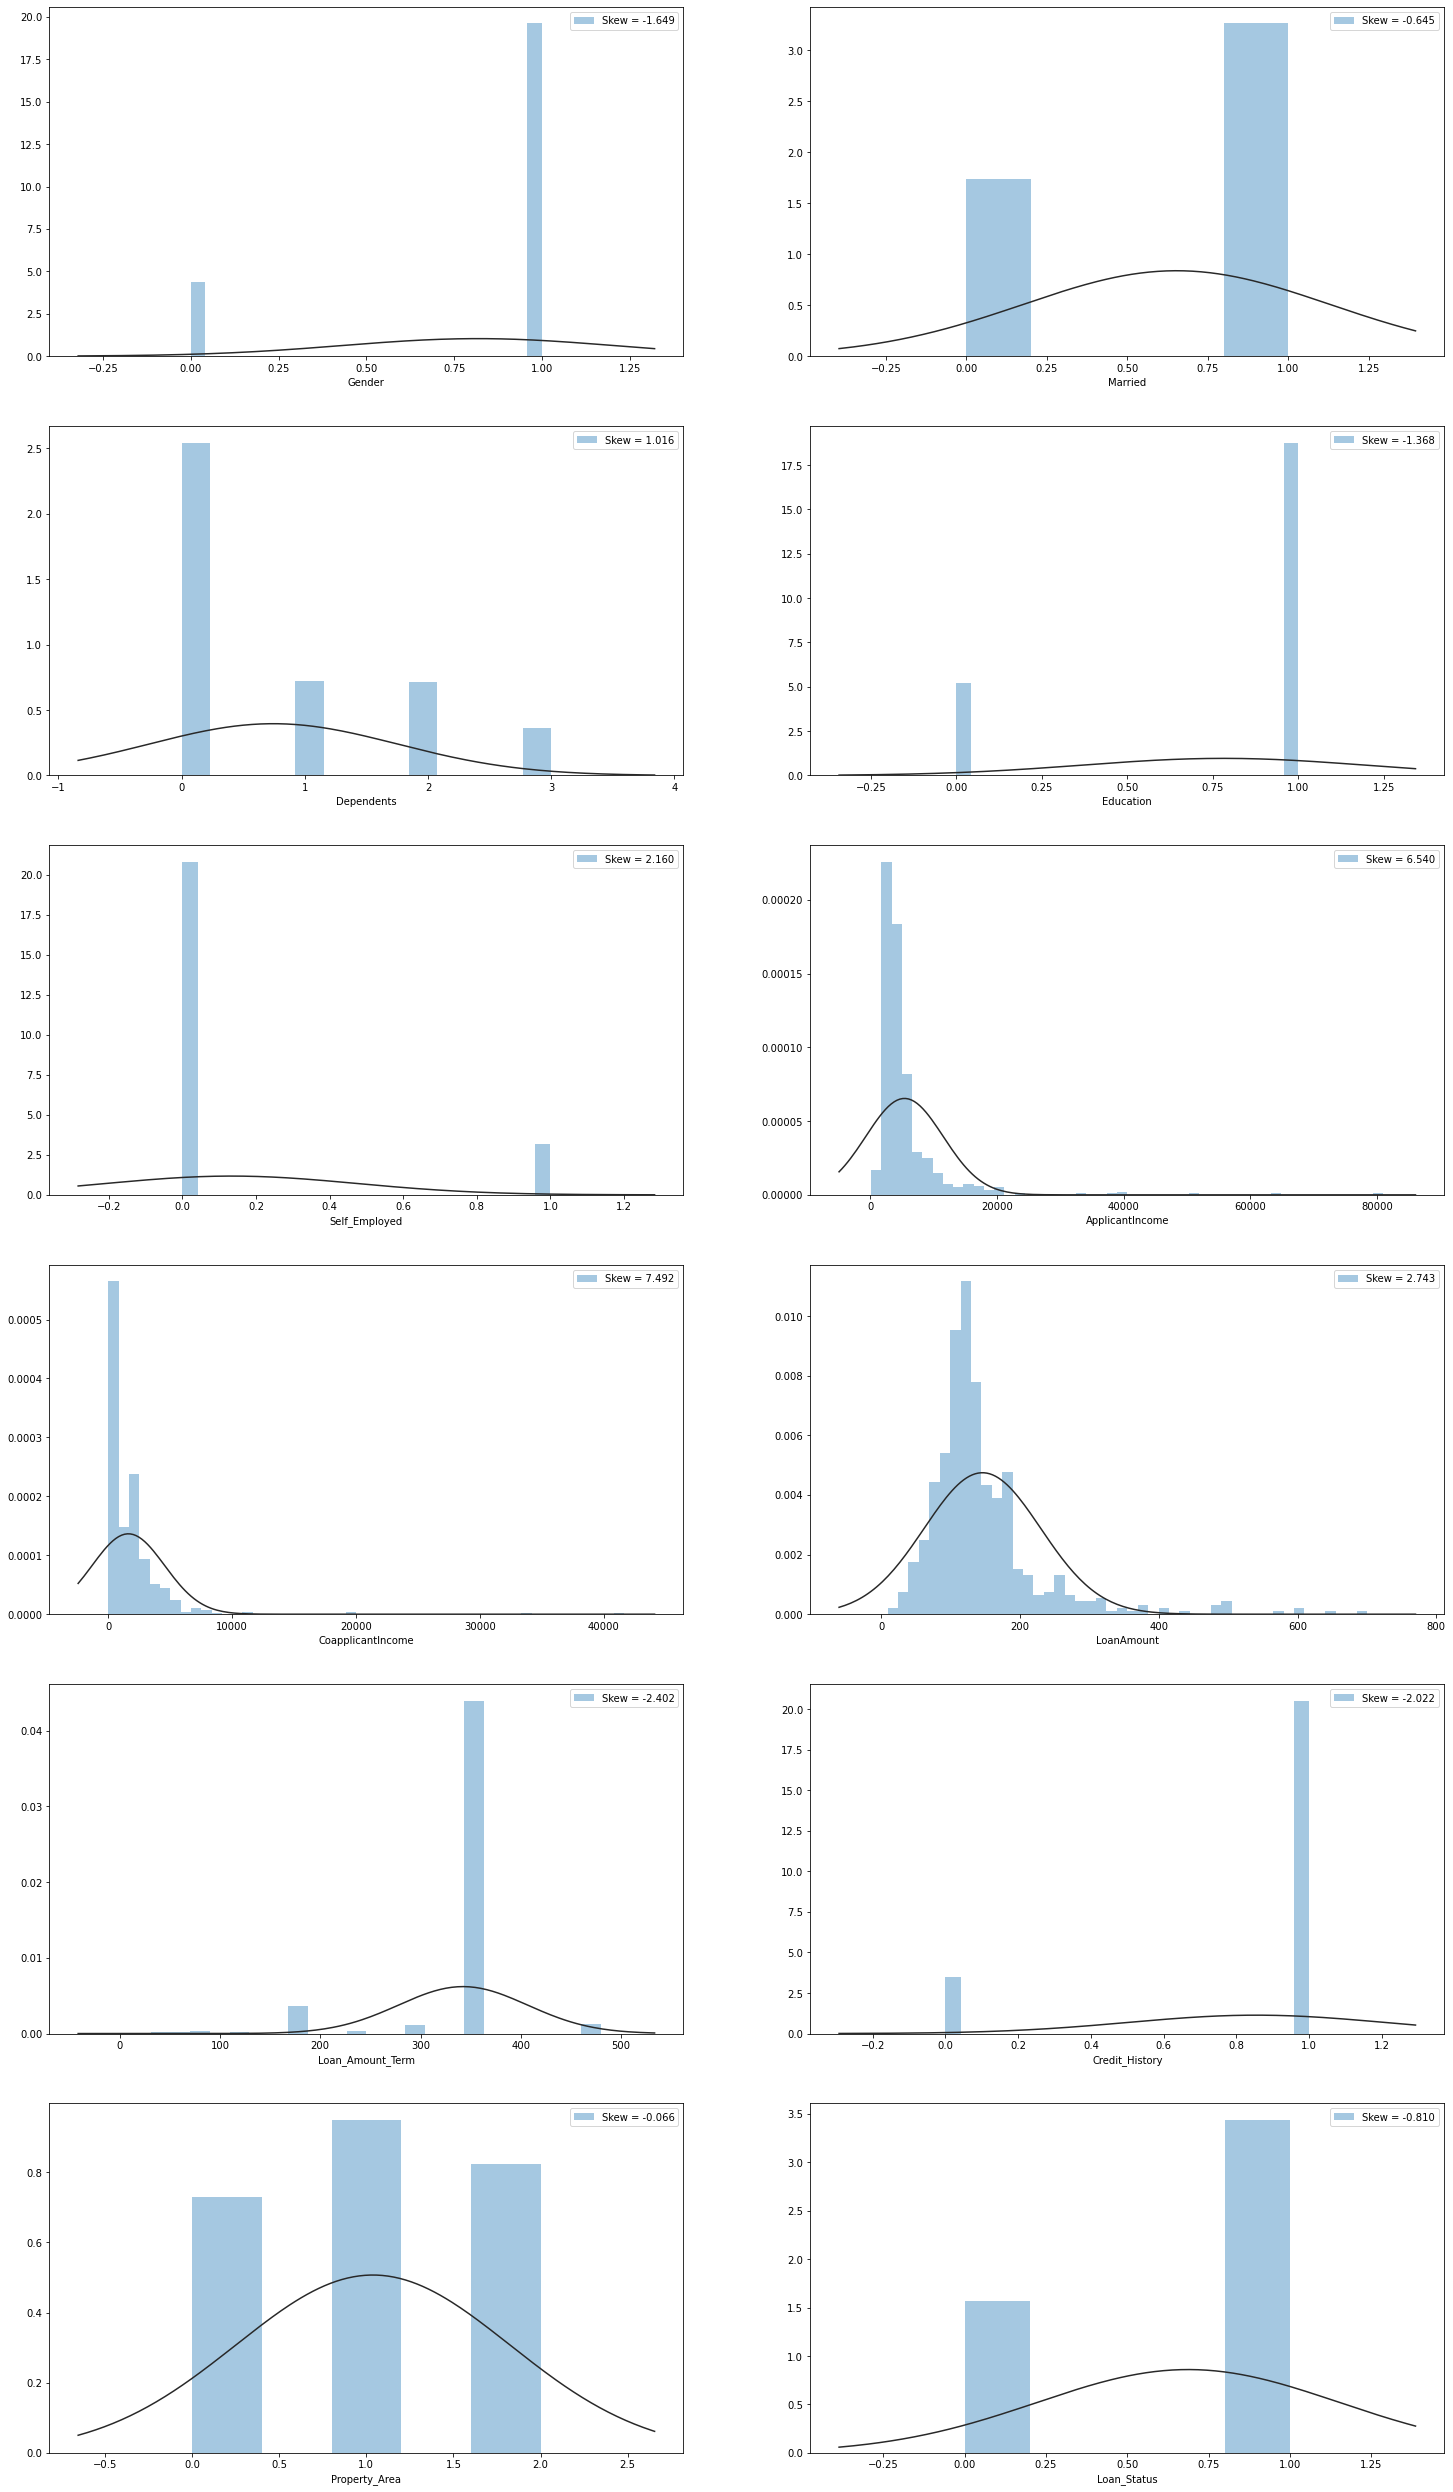

In [18]:
#plotting a histogram of each independent feature for visualization
cols = df.columns
fig,ax = plt.subplots(6,2, figsize=(25, 45))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

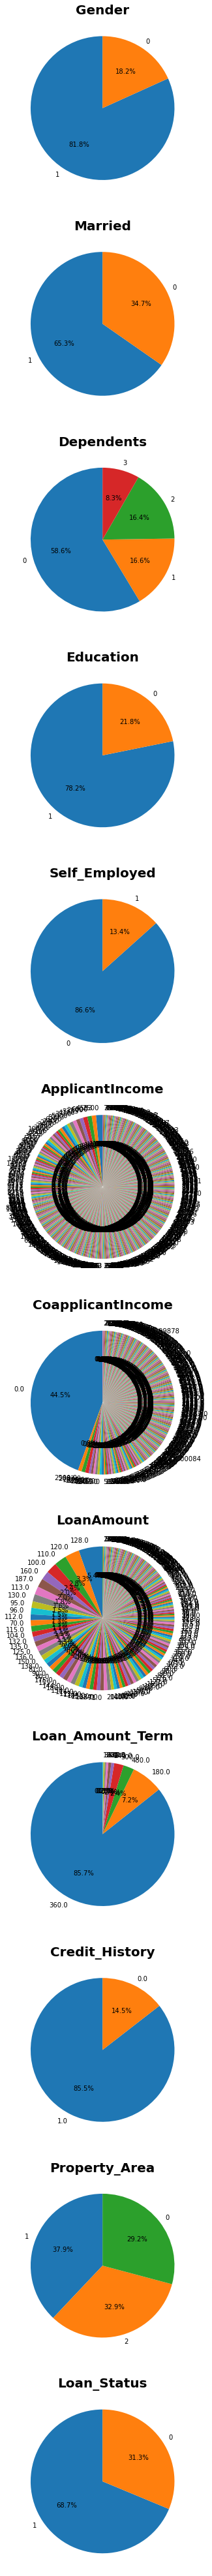

In [19]:
# Count the number of occurrences of each unique value in each column
value_counts = [df[column].value_counts() for column in df.columns]

# Create a figure with subplots for each column
fig, axs = plt.subplots(nrows=len(df.columns), figsize=(8, 6*len(df.columns)))

# Plot a pie chart for each column
for i, (column, vc) in enumerate(zip(df.columns, value_counts)):
    axs[i].pie(vc, labels=vc.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(column, fontsize=20, fontweight='bold')

plt.show()

### BIVARIATE ANALYSIS


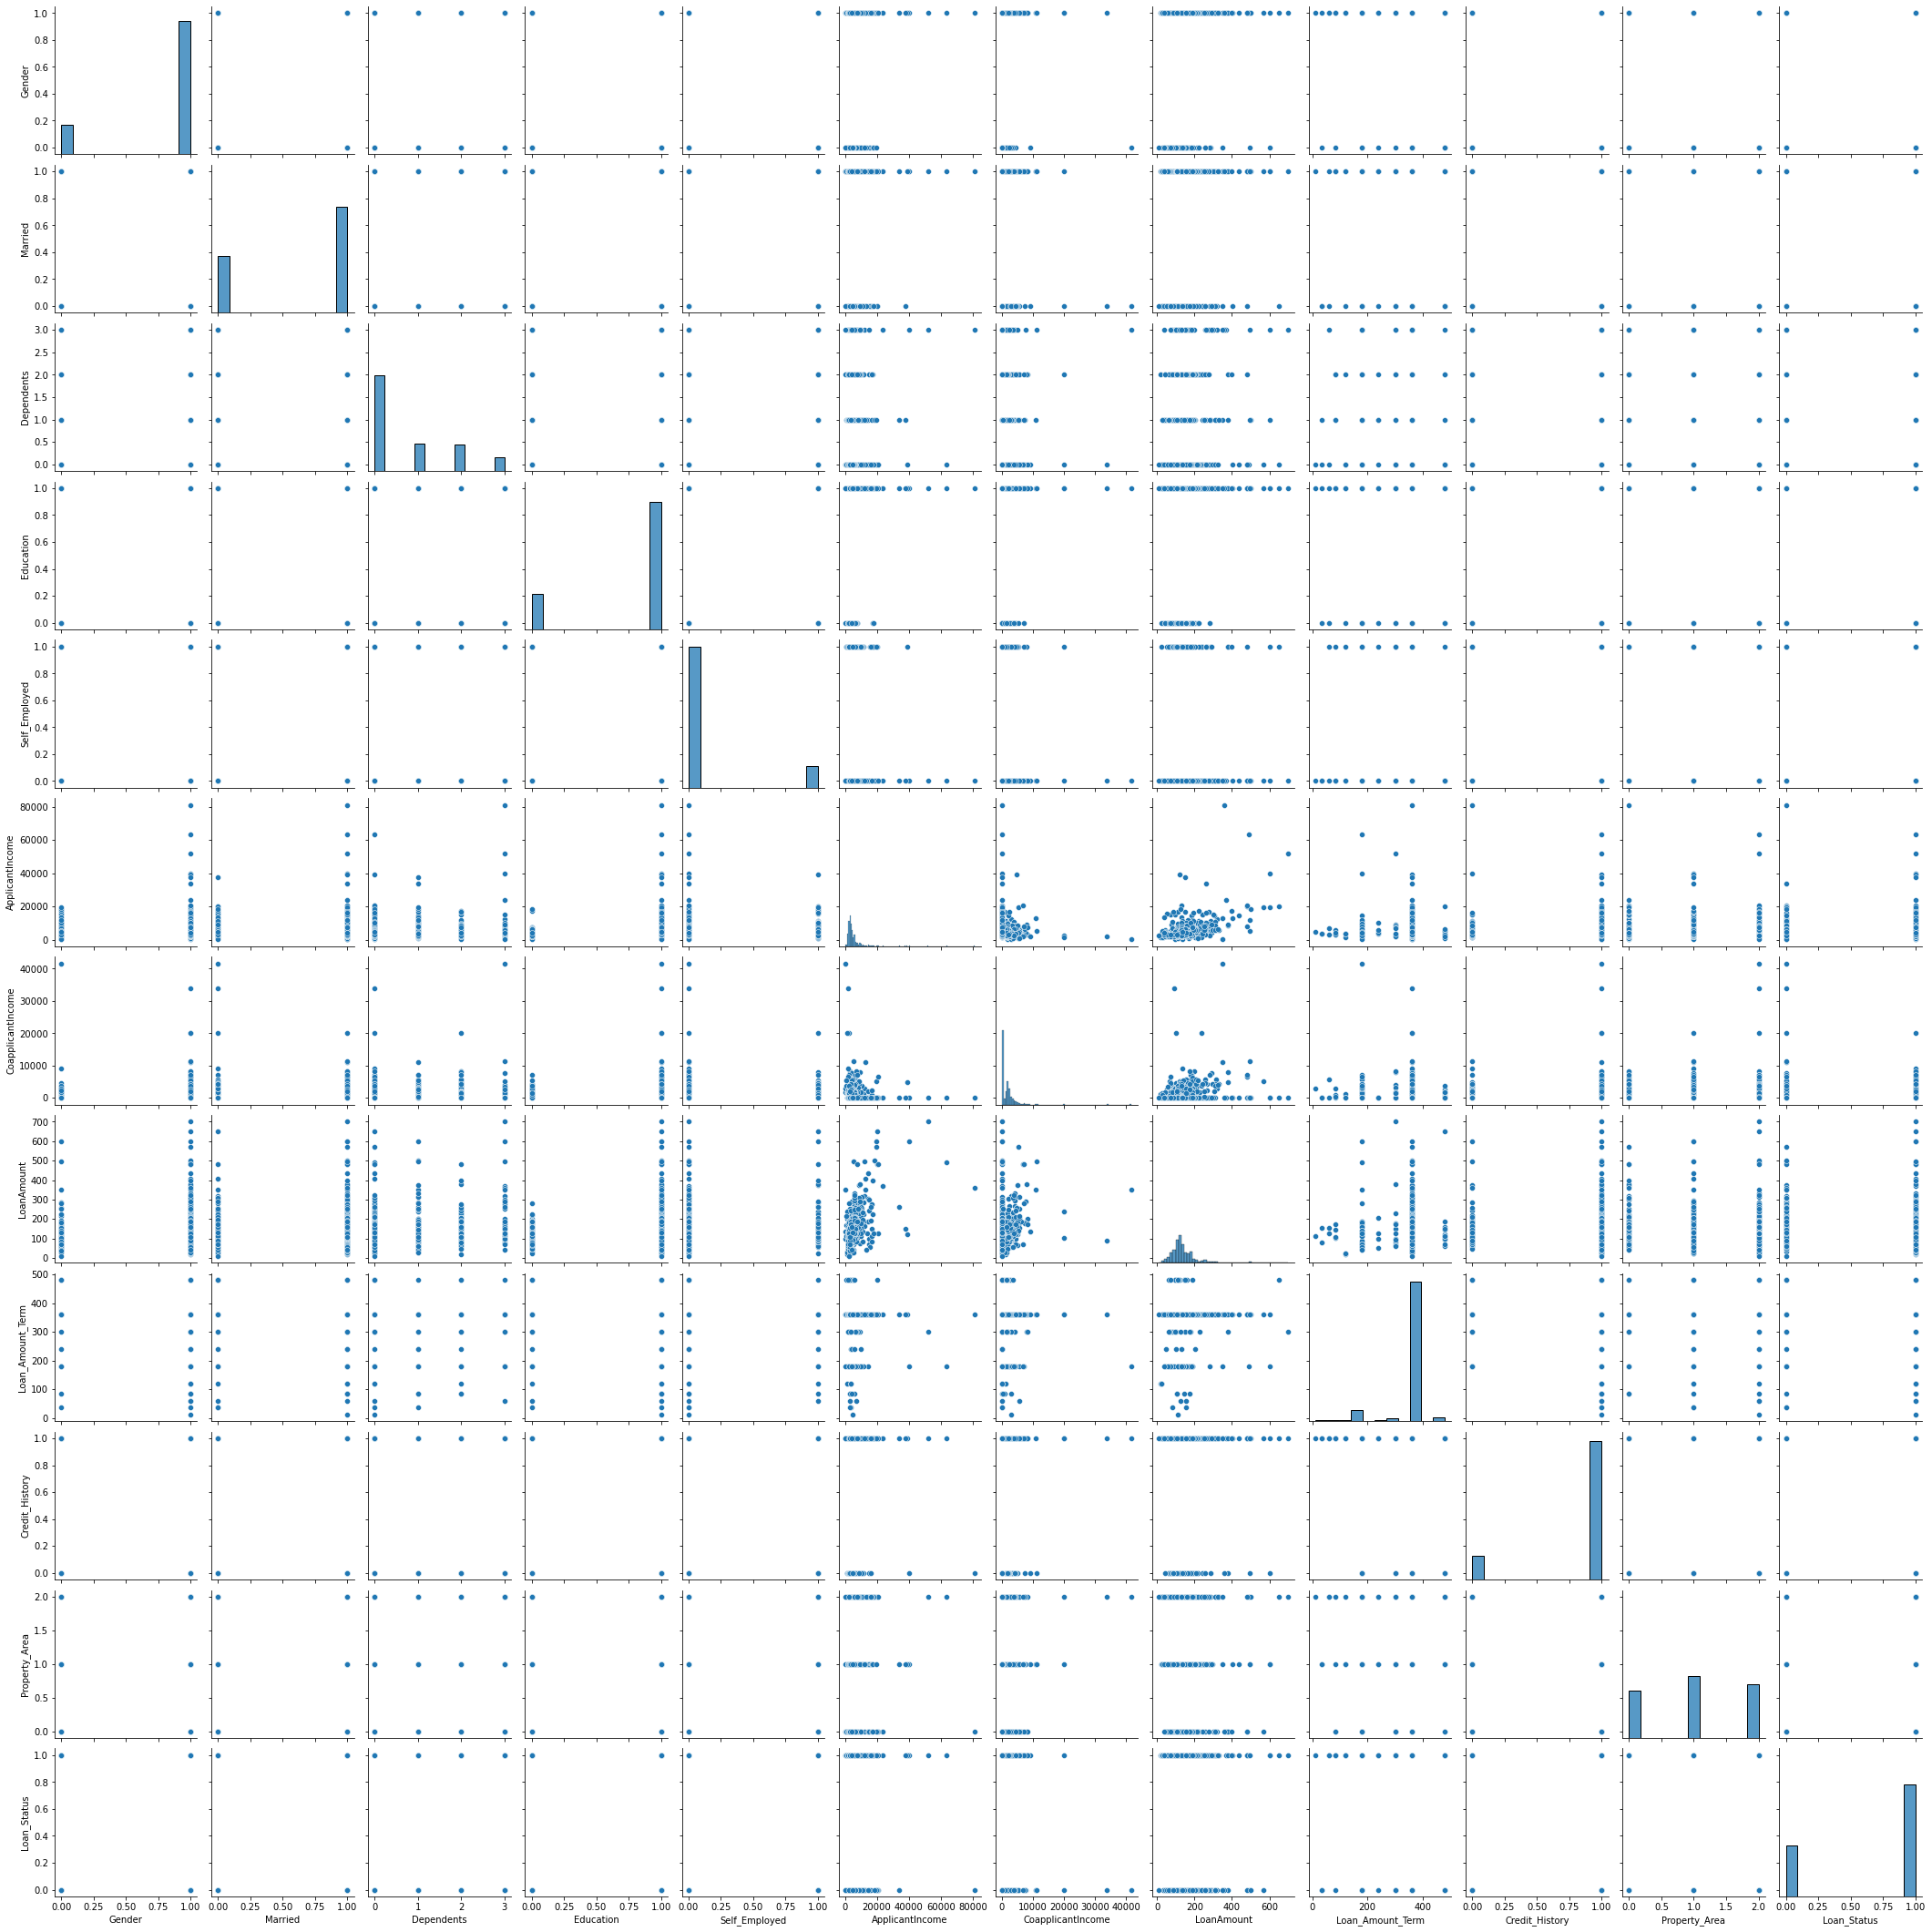

In [20]:
sns.pairplot(df)
plt.show()

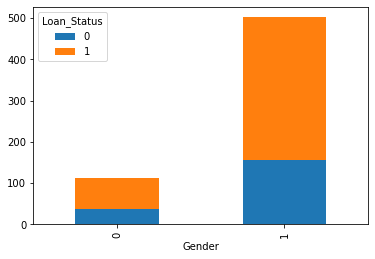

In [21]:
# Create a contingency table of Workclass and Income
cont_table = pd.crosstab(df['Gender'], df['Loan_Status'])

# Plot a stacked bar chart
cont_table.plot(kind='bar', stacked=True)
plt.show()

As we can see, no. of women who take loan is very less than men.

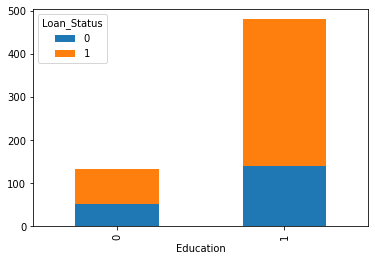

In [22]:
cont_table = pd.crosstab(df['Education'], df['Loan_Status'])
cont_table.plot(kind='bar', stacked=True)
plt.show()

<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

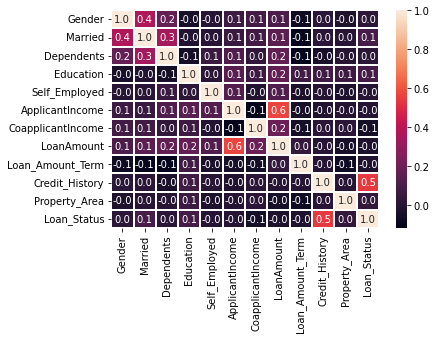

In [23]:
plt.figure(figsize=(10,10))
plt.figure(facecolor='white')
sns.heatmap(df.corr(),fmt='.1f',
            linewidths=2,annot=True)

Graduate people take more loan than non-graduate people.

### SKEWNESS HANDLING

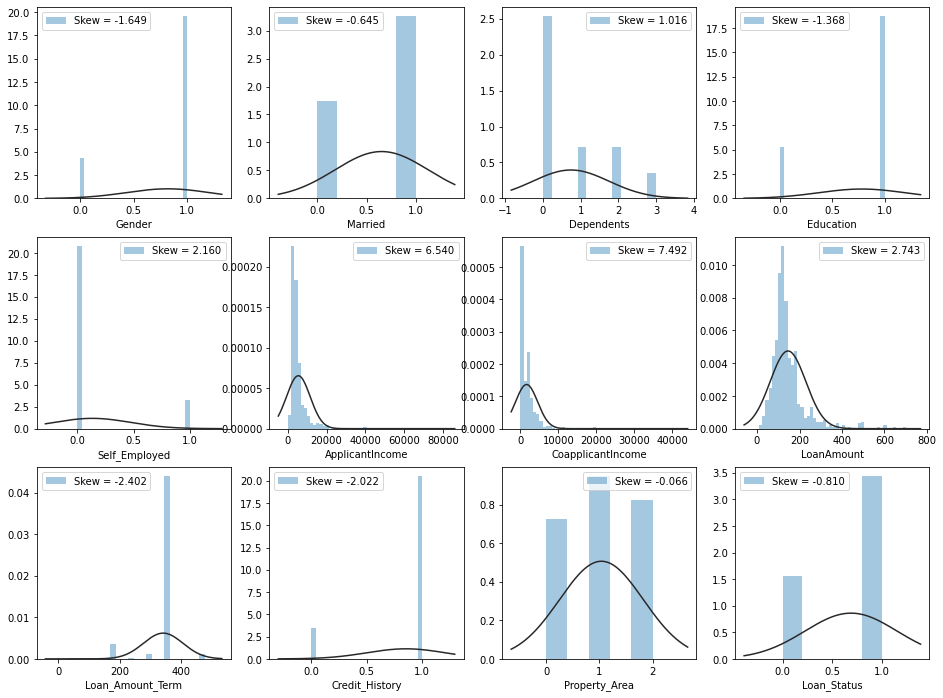

In [24]:
fig,ax = plt.subplots(3,4, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in df.columns:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

In [25]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [26]:
# apply log transformation to Total_Income
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

# apply log transformation to EMI
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])

In [27]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      0.479580
CoapplicantIncome         NaN
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Skewness has been treated.

In [28]:
df.drop('CoapplicantIncome', axis=1, inplace=True)

### OUTLIERS TREATMENT

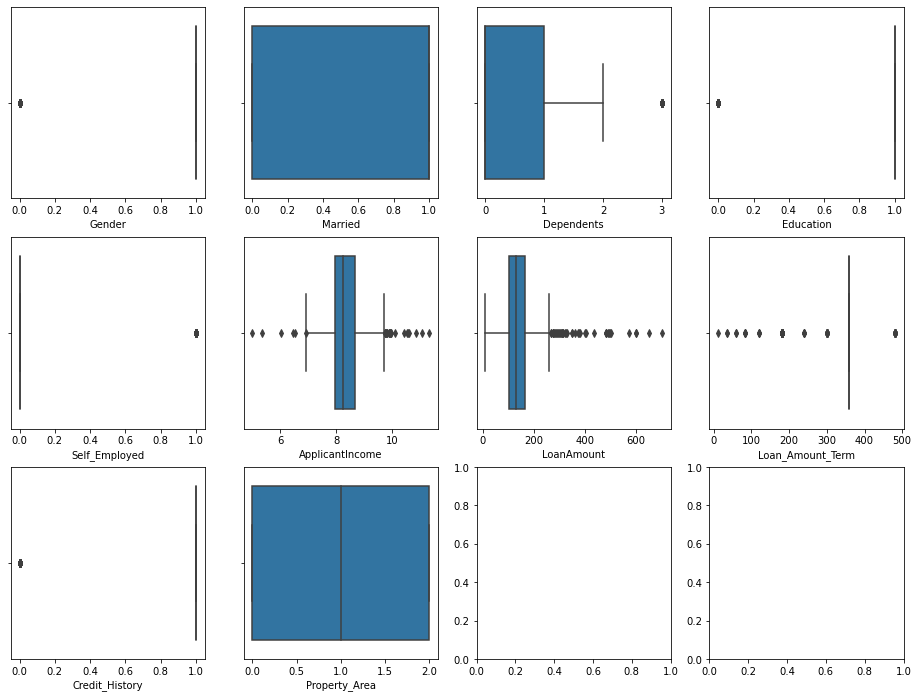

In [31]:
#USING BOXPLOT
fig,ax = plt.subplots(3,4, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in df.drop("Loan_Status",axis=1).columns:
    skew = df.drop("Loan_Status",axis=1)[col].skew()
    sns.boxplot(df[col], ax = ax[i])  
    i += 1
plt.show()

In [34]:
z=np.abs(zscore(df.drop("Loan_Status",axis=1)))
dfn=df[(z<3).all(axis=1)]
dfn

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,128.0,360.0,1.0,2,1
1,1,1,1,1,0,8.430109,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,66.0,360.0,1.0,2,1
3,1,1,0,0,0,7.856707,120.0,360.0,1.0,2,1
4,1,0,0,1,0,8.699515,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,7.972466,71.0,360.0,1.0,0,1
610,1,1,3,1,0,8.320205,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8.996157,253.0,360.0,1.0,2,1
612,1,1,2,1,0,8.933664,187.0,360.0,1.0,2,1


In [35]:
# data loss
data_loss=((df.shape[0]-dfn.shape[0])/df.shape[0])*100
print(f'data loss is : {data_loss:0.1f}%')

data loss is : 5.5%


### MODEL BUILDING

In [39]:
X = dfn.drop('Loan_Status', axis=1)
y = dfn['Loan_Status']
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)


In [40]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,8.674026,128.0,360.0,1.0,2
1,1,1,1,1,0,8.430109,128.0,360.0,1.0,0
2,1,1,0,1,1,8.006368,66.0,360.0,1.0,2
3,1,1,0,0,0,7.856707,120.0,360.0,1.0,2
4,1,0,0,1,0,8.699515,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,7.972466,71.0,360.0,1.0,0
610,1,1,3,1,0,8.320205,40.0,180.0,1.0,0
611,1,1,1,1,0,8.996157,253.0,360.0,1.0,2
612,1,1,2,1,0,8.933664,187.0,360.0,1.0,2


In [41]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 580, dtype: int32

### RANDOM FORREST CLASSIFIER

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    rfc.fit(x_train,y_train)
   
    rfc_predict_test=rfc.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{accuracy_score(y_test,rfc_predict_test)}')
    
    print('\n')

At random state 0, The training accuracy is :-0.78125


At random state 1, The training accuracy is :-0.78125


At random state 2, The training accuracy is :-0.7708333333333334


At random state 3, The training accuracy is :-0.7395833333333334


At random state 4, The training accuracy is :-0.8020833333333334


At random state 5, The training accuracy is :-0.7708333333333334


At random state 6, The training accuracy is :-0.796875


At random state 7, The training accuracy is :-0.8020833333333334


At random state 8, The training accuracy is :-0.7916666666666666


At random state 9, The training accuracy is :-0.8072916666666666


At random state 10, The training accuracy is :-0.8020833333333334


At random state 11, The training accuracy is :-0.8020833333333334


At random state 12, The training accuracy is :-0.8072916666666666


At random state 13, The training accuracy is :-0.8125


At random state 14, The training accuracy is :-0.8177083333333334


At random state 15, The training a

At random state 45, The training accuracy is :-0.8541666666666666

In [43]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=78)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(406, 10) (406,)
(174, 10) (174,)


In [44]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

accuracy score for  LogisticRegression() is :  0.8390804597701149 
 [[ 25  26]
 [  2 121]] 
               precision    recall  f1-score   support

           0       0.93      0.49      0.64        51
           1       0.82      0.98      0.90       123

    accuracy                           0.84       174
   macro avg       0.87      0.74      0.77       174
weighted avg       0.85      0.84      0.82       174
 

Cross Validation Score is : [0.82926829 0.7654321  0.82716049 0.75308642 0.82716049]
Mean Score : 0.8004215597711533


accuracy score for  GaussianNB() is :  0.8390804597701149 
 [[ 25  26]
 [  2 121]] 
               precision    recall  f1-score   support

           0       0.93      0.49      0.64        51
           1       0.82      0.98      0.90       123

    accuracy                           0.84       174
   macro avg       0.87      0.74      0.77       174
weighted avg       0.85      0.84      0.82       174
 

Cross Validation Score is : [0.82926829 0.765

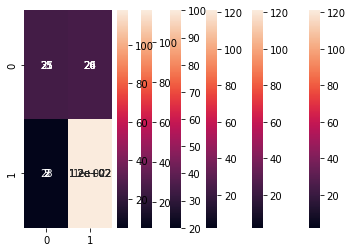

In [45]:
model=[lg,gnb,svc,dtc,knn,rfc]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print("accuracy score for ",m,"is : ",accuracy_score(test_y,predm),"\n",confusion_matrix(test_y,predm),"\n",classification_report(test_y,predm),"\n")
    sns.heatmap(confusion_matrix(test_y,predm),annot=True)
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("==============================================\n\n\n====================================================")

### LOGISTIC REGRESSION

In [48]:
lg.fit(x_train,y_train)
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
score_acc=accuracy_score(y_test,pred_test)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Auc test: ',score_acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))

Roc_Auc train:  0.7123044965786902
Roc_Auc test:  0.7095516569200779
Auc test:  0.8125
Confusion Matrix:  
 [[ 26  31]
 [  5 130]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.84      0.46      0.59        57
           1       0.81      0.96      0.88       135

    accuracy                           0.81       192
   macro avg       0.82      0.71      0.73       192
weighted avg       0.82      0.81      0.79       192



### DECISION TREE

In [49]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_train=dtc.predict(x_train)
pred_test=dtc.predict(x_test)
score_train=roc_auc_score(y_train,pred_train)
score_test=roc_auc_score(y_test,pred_test)
print('Roc_Auc Score_train: ',score_train)
print('Roc_Auc Score_test: ',score_test)
print('Confusion Matrix: ' ,'\n','\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(dtc,x,y,cv=9).mean())

Roc_Auc Score_train:  1.0
Roc_Auc Score_test:  0.6935672514619883
Confusion Matrix:  
 
 [[ 36  21]
 [ 33 102]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.52      0.63      0.57        57
           1       0.83      0.76      0.79       135

    accuracy                           0.72       192
   macro avg       0.68      0.69      0.68       192
weighted avg       0.74      0.72      0.73       192

CV  :  0.7069444444444445


### SVC

In [50]:
svc= SVC()
svc.fit(x_train,y_train)
pred_train=svc.predict(x_train)
pred_test=svc.predict(x_test)
score_test=roc_auc_score(y_test,pred_test)
score_train=roc_auc_score(y_train,pred_train)
print('Roc_Auc train: ',score_train)
print('Roc_Auc test: ',score_test)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(svc,x,y,cv=9).mean())

Roc_Auc train:  0.7383919843597263
Roc_Auc test:  0.7294346978557504
Confusion Matrix:  
 [[ 27  30]
 [  2 133]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.93      0.47      0.63        57
           1       0.82      0.99      0.89       135

    accuracy                           0.83       192
   macro avg       0.87      0.73      0.76       192
weighted avg       0.85      0.83      0.81       192

CV  :  0.813969017094017


### HYPER PARAMETER TUNING

In [51]:
dict2={"random_state":[50,100,200],"criterion":['gini', 'entropy',],"min_samples_split":[2,3]}
gv=GridSearchCV(rfc,dict2, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'entropy', 'min_samples_split': 2, 'random_state': 200}

In [52]:
rf1=RandomForestClassifier(criterion='gini', min_samples_split=3 , random_state= 50)
rf1.fit(train_x,train_y)
prf=rf1.predict(test_x)
print(accuracy_score(test_y,prf))
score=cross_val_score(m,train_x,train_y,cv=5)
print("Cross Validation Score is :",score)
print("Mean Score :",score.mean())

0.8218390804597702
Cross Validation Score is : [0.7804878  0.7654321  0.82716049 0.74074074 0.7654321 ]
Mean Score : 0.7758506473953629


### SAVING THE MODEL

In [53]:
import joblib
joblib.dump(rf1,"LOAN_STATUS.obj")

['LOAN_STATUS.obj']

In [54]:
dataset=joblib.load('LOAN_STATUS.obj')

### PREDICTION

In [55]:
#Predict

prediction = dataset.predict(x_test)

prediction

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [56]:
pd.DataFrame([dataset.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
Predicted,1,1,1,0,0,0,1,1,1,1,...,1,1,1,0,1,1,0,1,1,0
Original,1,1,1,0,0,0,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
